# Dinamika boje na regularnem valu

V primeru regularnega vala, to je $\zeta(t) = \zeta_0 \sin (\omega_d \: t)$ in linearnih prispevkov sil, lahko sistem obravnavamo kot vsiljeno nihanje.

Če imamo bojo, ki je pripeta z elastično vrvjo in ji omejimo gibanje samo v $z$ smeri, se tako obravnava bistveno poenostavi.

Sile, ki delujejo:
- *inercija* : masa $m$
- *upor* : linearen upor $D_d = C_{\mathrm{d}} \, v$
- *hidrostatična sila* : vzgon telesa $F_{\mathrm{hs}} = C_{\mathrm{hs}} (z - \zeta)$
- *sila vzmeti* : linearna vzmet $F_{\mathrm{pto}} = C_{\mathrm{pto}} \, z$

Tako lahko zapišemo dinamiko gibanja boje na periodičnem valu

$$
m \ddot{z} + C_{\mathrm{d}} \dot{z} + C_{\mathrm{hs}} (z - \zeta) + C_{\mathrm{pto}} \, z = 0
$$

Enačbo uredimo in privzamemo periodičen val

$$
m \ddot{z} + C_{\mathrm{d}} \dot{z} +  \big( C_{\mathrm{hs}} + C_{\mathrm{pto}} \big) \, z = C_{\mathrm{hs}} \, \zeta_0 \, \sin (\omega_d \, t)
$$

dobimo enačbo za [vsiljeno nihanje](https://en.wikipedia.org/wiki/Harmonic_oscillator#Driven_harmonic_oscillators)

$$
\ddot{z} + 2 \beta \dot{z} +  \omega_0^2 \, z = f_0 \, \sin (\omega_d \, t).
$$

Rešitev vsiljenega nihanja $z(t)$ poznamo, to je rešitev dušenega nihanja $z_h(t)$, ki mu prištejemo partikularno rešitev $z_p(t)$

$$
z(t) = z_h(t) + z _p(t) = z_h(t) + A \sin(\omega_w \, t + \delta),
$$

kjer sta konstanti partikularne rešitve **amplituda** $A$ in **faza** $\delta$ določeni kot

$$
A = \frac{f_0}{\sqrt{\big(\omega_0^2 - \omega_d^2\big) + \big( 2 \beta \omega_d^2\big)^2}}, ~~~~ \tan \phi = \frac{2 \beta \omega_d}{\omega_0^2 - \omega_d^2}.
$$

Fazni kot $\delta$ določimo intervalno

$$
\delta =
\begin{cases}
\phi &, \omega_d \leq \omega_d \\
\pi - \phi &, \omega_d > \omega_d \\
\end{cases}
$$

In [1]:
import math as mat
import numpy as np

import matplotlib.pyplot as mpl
mpl.rcParams['text.usetex'] = True

In [2]:
def get_amplitude_phase(b,w0,f0, wv):
    
    Av = []
    dv = []
    for w in wv:
        A = f0 / mat.sqrt( (w0**2 - w**2)**2 + (2*b*w)**2 )
        if w > w0:
            d = mat.pi + mat.atan(2*b*w / (w0**2 - w**2))
        else: 
            d = mat.atan(2*b*w / (w0**2 - w**2))
            
        Av.append(A)
        dv.append(d)
        
    return [np.array(Av), np.array(dv)]

In [3]:
beta = 0.005
omega = 2.351
f0 = 5.028
wv = np.linspace(1,11,1000)

[A, phi] = get_amplitude_phase(beta,omega,f0,wv)
mag = A/(f0/omega)
A_dB = 20 * np.log10(A)
mag_dB = 20 * np.log10(mag)
phi_deg = phi*180.0/mat.pi

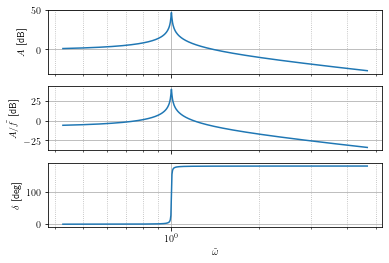

In [4]:
fig, ax = mpl.subplots(3)
#fig.suptitle(r'Heave FR')

ax[0].semilogx(wv/omega,A_dB)
ax[0].set_xticklabels([])
ax[0].set_ylabel(r'$A$ [dB]')
ax[0].grid(which='major', linestyle='-')
ax[0].grid(which='minor', linestyle=':')

ax[1].semilogx(wv/omega,mag_dB)
ax[1].set_xticklabels([])
ax[1].set_ylabel(r'$A/\tilde{f}$ [dB]')
ax[1].grid(which='major', linestyle='-')
ax[1].grid(which='minor', linestyle=':')

ax[2].semilogx(wv/omega,phi_deg)
ax[2].set_xlabel(r'$\tilde{\omega}$')
ax[2].set_ylabel(r'$\delta$ [deg]')
ax[2].grid(which='major', linestyle='-')
ax[2].grid(which='minor', linestyle=':')

fig.savefig('mag_phi_graph.pdf', bbox_inches='tight')

# Fazni kot in interpretacija

Sedaj si poglejmo, kaj pomenijo različni fazni koti $\delta$ v partikularnem delu rešitve $z_p(t)$ vsiljenega nihanja. Fazni kot ima rešitev na intervalu

$$
\delta \in [0, \pi] ~~~ \mathrm{ali} ~~~ \delta \in [0^\circ, 180^\circ].
$$

Tako ločimo 3 primere, kjer gledamo nihanje boje $z(t)$ glede na prihajajoči val $\zeta(t)$:

- $\delta = 0^\circ$ : nihanji sta sinhroni ali rečemo da sta **v fazi**
- $0^\circ < \delta < 180^\circ$ : nihanji sta **iz faze**
- $\delta = 180^\circ$ : nihanji sta si v **kontra fazi**

Spodnje slike kažejo ta različna gibanja boje:

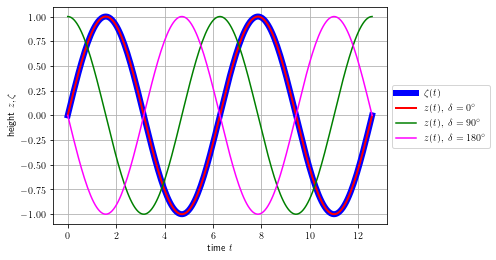

In [5]:
t = np.linspace(0,4*mat.pi,200)
w = np.sin(t)
z1 = np.sin(t)
z2 = np.sin(t + mat.pi/2)
z3 = np.sin(t + mat.pi)

fig, ax = mpl.subplots()
ax.plot(t,w, color='blue', linewidth=6, label=r'$\zeta(t)$')
ax.plot(t,z1, color='red', linewidth=2, label=r'$z(t),~\delta = 0^\circ$')
ax.plot(t,z2, color='green', label=r'$z(t),~\delta = 90^\circ$')
ax.plot(t,z3, color='magenta', label=r'$z(t),~\delta = 180^\circ$')
ax.set_xlabel(r'time $t$')
ax.set_ylabel(r'height $z,\zeta$')
ax.grid()
#ax.legend()
fig.legend(bbox_to_anchor=(0.9,0.5), loc='center left')

fig.savefig('phase_diff_plot_shb.pdf', bbox_inches='tight')